### Loading data from csv to database

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
pd.set_option('display.max_columns', None)

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-QEE21EV;'
                      'Database=Airbnb_db_test;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

In [3]:
cursor.execute('CREATE TABLE Listings_skrypt ( \
               id int, \
               listing_url nvarchar(MAX),  \
                scrape_id float, \
               last_scraped  nvarchar(MAX), \
               name nvarchar(MAX), \
               description nvarchar(MAX), \
               neighborhood_overview nvarchar(MAX),\
               picture_url nvarchar(MAX), \
               host_id int, \
               host_url nvarchar(MAX), \
               host_name nvarchar(MAX), \
               host_since  nvarchar(MAX), \
               host_location nvarchar(MAX), \
               host_about nvarchar(MAX), \
               host_response_time nvarchar(MAX), \
               host_response_rate nvarchar(MAX), \
               host_acceptance_rate nvarchar(MAX), \
               host_is_superhost nvarchar(MAX), \
               host_thumbnail_url nvarchar(MAX), \
               host_picture_url nvarchar(MAX), \
               host_neighbourhood nvarchar(MAX), \
               host_listings_count  nvarchar(MAX), \
               host_total_listings_count  nvarchar(MAX), \
               host_verifications nvarchar(MAX), \
               host_has_profile_pic nvarchar(MAX), \
               host_identity_verified  nvarchar(MAX), \
               neighbourhood nvarchar(MAX),\
               neighbourhood_cleansed nvarchar(MAX), \
               neighbourhood_group_cleansed nvarchar(MAX), \
               latitude nvarchar(MAX), \
               longitude nvarchar(MAX), \
               property_type nvarchar(MAX), \
               room_type  nvarchar(MAX), \
               accommodates nvarchar(MAX) , \
               bathrooms nvarchar(MAX), \
               bathrooms_text nvarchar(MAX), \
               bedrooms nvarchar(MAX), \
               beds nvarchar(MAX), \
               amenities nvarchar(MAX), \
               price nvarchar(MAX), \
               minimum_nights  nvarchar(MAX), \
               maximum_nights int, \
               minimum_minimum_nights nvarchar(MAX), \
               maximum_minimum_nights nvarchar(MAX), \
               minimum_maximum_nights int , \
               maximum_maximum_nights int, \
               minimum_nights_avg_ntm nvarchar(MAX), \
               maximum_nights_avg_ntm nvarchar(MAX), \
               calendar_updated nvarchar(MAX), \
               has_availability  nvarchar(MAX), \
               availability_30  nvarchar(MAX) , \
               availability_60  nvarchar(MAX), \
               availability_90  nvarchar(MAX), \
               availability_365  nvarchar(MAX), \
               calendar_last_scraped  nvarchar(MAX), \
               number_of_reviews  nvarchar(MAX), \
               number_of_reviews_ltm  nvarchar(MAX), \
               number_of_reviews_l30d  nvarchar(MAX), \
               first_review  nvarchar(MAX), \
               last_review  nvarchar(MAX), \
               review_scores_rating  nvarchar(MAX), \
               review_scores_accuracy   nvarchar(MAX), \
               review_scores_cleanliness   nvarchar(MAX), \
               review_scores_checkin   nvarchar(MAX), \
               review_scores_communication  nvarchar(MAX), \
               review_scores_location  nvarchar(MAX), \
               review_scores_value  nvarchar(MAX), \
               license nvarchar(MAX), \
               instant_bookable  nvarchar(MAX), \
               calculated_host_listings_count  nvarchar(MAX) , \
               calculated_host_listings_count_entire_homes  nvarchar(MAX), \
               calculated_host_listings_count_private_rooms  nvarchar(MAX), \
               calculated_host_listings_count_shared_rooms nvarchar(MAX), \
               reviews_per_month nvarchar(MAX))')

In [4]:
conn.commit()

In [51]:
files= ['Barcelona, Catalonia, Spain']#, 'Bergamo, Lombardia, Italy', 'Lisbon, Lisbon, Portugal']

In [52]:
for file in files:
    data = pd.read_csv (f'./data/data/{file}.csv')   
    df = pd.DataFrame(data)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18226 non-null  int64  
 1   listing_url                                   18226 non-null  object 
 2   scrape_id                                     18226 non-null  int64  
 3   last_scraped                                  18226 non-null  object 
 4   name                                          18215 non-null  object 
 5   description                                   18073 non-null  object 
 6   neighborhood_overview                         11104 non-null  object 
 7   picture_url                                   18226 non-null  object 
 8   host_id                                       18226 non-null  int64  
 9   host_url                                      18226 non-null 

In [10]:
date_cols=['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

In [11]:
int_cols=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [12]:
for col in date_cols:
    df[col]=df[col].astype(str)

In [13]:
for col in int_cols:
    df[col]=df[col].astype(str)

In [14]:
float_cols = ['host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds', 'neighbourhood_group_cleansed',
   'latitude', 'longitude' , 'reviews_per_month', 'bathrooms', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm' ]  

In [15]:
for col in float_cols:
    df[col] = df[col].astype(str)

In [16]:
df = df.replace({np.nan:None})

### INSERT DATA

In [17]:
for row in df.itertuples():
    cursor.execute('''
                INSERT INTO Listings_skrypt
                VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?, \
                ?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                ''',
                 row.id, row.listing_url, row.scrape_id, row.last_scraped,
                 row.name, row.description, row.neighborhood_overview,
                 row.picture_url, row.host_id, row.host_url,
                 row.host_name, row.host_since, row.host_location, row.host_about,
                 row.host_response_time, row.host_response_rate, row.host_acceptance_rate,
                 row.host_is_superhost, row.host_thumbnail_url, row.host_picture_url,
                 row.host_neighbourhood, row.host_listings_count,
                 row.host_total_listings_count, row.host_verifications,
                 row.host_has_profile_pic, row.host_identity_verified, row.neighbourhood,
                 row.neighbourhood_cleansed, row.neighbourhood_group_cleansed, row.latitude,
                 row.longitude, row.property_type, row.room_type, row.accommodates, row.bathrooms,
                 row.bathrooms_text, row.bedrooms, row.beds, row.amenities, row.price,
                 row.minimum_nights, row.maximum_nights, row.minimum_minimum_nights,
                 row.maximum_minimum_nights, row.minimum_maximum_nights,
                 row.maximum_maximum_nights, row.minimum_nights_avg_ntm,
                 row.maximum_nights_avg_ntm, row.calendar_updated, row.has_availability,
                 row.availability_30, row.availability_60, row.availability_90,
                 row.availability_365, row.calendar_last_scraped, row.number_of_reviews,
                 row.number_of_reviews_ltm, row.number_of_reviews_l30d, row.first_review,
                 row.last_review, row.review_scores_rating, row.review_scores_accuracy,
                 row.review_scores_cleanliness, row.review_scores_checkin,
                 row.review_scores_communication, row.review_scores_location,
                 row.review_scores_value, row.license, row.instant_bookable,
                 row.calculated_host_listings_count,
                 row.calculated_host_listings_count_entire_homes,
                 row.calculated_host_listings_count_private_rooms,
                 row.calculated_host_listings_count_shared_rooms, row.reviews_per_month
                )
conn.commit()

In [119]:
df = pd.read_excel('data\TOUR_OCC_ARN2$DEFAULTVIEW1621782256780.xlsx', 'Sheet 1', skiprows=9, nrows=494)

In [120]:
df

,TIME,2015,Unnamed: 2,2016,Unnamed: 4,2017,Unnamed: 6,2018,Unnamed: 8,2019,Unnamed: 10
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),331052355,NaN,346490274,NaN,374967422,e,392936908,e,406907066,NaN
2,European Union - 28 countries (2013-2020),375326474,NaN,389959878,NaN,421718616,e,440606716,e,457076390,e
3,European Union - 27 countries (2007-2013),362782965,NaN,376252434,NaN,406136912,e,423971703,e,439728334,e
4,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",285186445,NaN,296604423,NaN,320653862,e,335717829,e,347795516,NaN
...,...,...,...,...,...,...,...,...,...,...,...
489,Crna Gora,1559924,NaN,1662121,NaN,843609,b,:,NaN,:,NaN
490,North Macedonia,479152,NaN,508300,NaN,626879,NaN,702833,NaN,755438,NaN
491,Severna Makedonija,479152,NaN,508300,NaN,626879,NaN,702833,NaN,755438,NaN
492,Severna Makedonija,479152,NaN,508300,NaN,626879,NaN,702833,NaN,755438,NaN


In [ ]:
### hurtownia

In [53]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20210412154247,2021-04-13,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within a day,50%,80%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,34.0,34.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire apartment,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Air conditioning"", ""Host greets you"", ""Essen...",$157.00,1,1125,1.0,3.0,1125.0,1125.0,1.4,1125.0,NaN,t,0,11,27,27,2021-04-13,21,0,0,2013-05-27,2019-11-01,88.0,9.0,10.0,10.0,10.0,10.0,9.0,HUTB-002062,t,21,21,0,0,0.22
1,23197,https://www.airbnb.com/rooms/23197,20210412154247,2021-04-14,Forum CCIB DeLuxe★Spacious &Elegant ★Large Bal...,"Beautiful spacious apartment, large terrace, 5...",Strategically located in the Parc del Fòrum ar...,https://a0.muscache.com/pictures/738532/806da1...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi. I'm Etain, though everyone calls me by my...",within an hour,100%,78%,f,https://a0.muscache.com/im/users/90417/profile...,https://a0.muscache.com/im/users/90417/profile...,El Besòs i el Maresme,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.41291,2.22063,Entire apartment,Entire home/apt,6,NaN,2 baths,3.0,5.0,"[""High chair"", ""Washer"", ""Refrigerator"", ""Sham...",$220.00,3,300,3.0,6.0,1125.0,1125.0,3.6,1125.0,NaN,t,29,54,84,359,2021-04-14,52,0,0,2011-03-15,2019-12-15,95.0,10.0,10.0,10.0,10.0,9.0,9.0,HUTB-005057,f,2,2,0,0,0.42


In [54]:
df = df.loc[:,['id','scrape_id','last_scraped','name',
'host_id','host_name','host_since','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
'host_listings_count','host_has_profile_pic','host_identity_verified',
'neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates',
'bathrooms','bathrooms_text','bedrooms','beds','amenities','price','minimum_nights','maximum_nights',
'availability_365','number_of_reviews','first_review','last_review','review_scores_rating',
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
'instant_bookable','reviews_per_month']]

In [55]:
df.shape[1]

40

In [56]:
host = df.loc[:,['host_id','host_name','host_since','host_is_superhost','host_has_profile_pic',
                 'host_identity_verified','host_response_time','host_response_rate','host_acceptance_rate',]]

In [57]:
host.shape[1]

9

In [255]:
host.duplicated().value_counts()

True     9429
False    8797
dtype: int64

In [236]:
listing = df.loc[:,['id','last_scraped', 'host_id','name','latitude','longitude','property_type','room_type',
                    'instant_bookable','first_review','last_review','accommodates','bathrooms','bathrooms_text',
                    'bedrooms','beds','amenities','price','minimum_nights','maximum_nights','availability_365',
                    'number_of_reviews','reviews_per_month','review_scores_rating','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location','host_listings_count']]

In [237]:
listing.shape[1]

29

In [238]:
amenity = df['amenities']

In [239]:
total = df.isna().sum().sort_values(ascending=False) # how many missings in each column
percent = (df.isna().sum()/df.isna().count()).round(4).sort_values(ascending=False) # in %
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.query('Total > 0')

,Total,Percent
bathrooms,18226,1.0000
neighbourhood,7122,0.3908
host_acceptance_rate,6999,0.3840
host_response_rate,6796,0.3729
host_response_time,6796,0.3729
review_scores_location,5907,0.3241
review_scores_checkin,5907,0.3241
review_scores_communication,5902,0.3238
review_scores_cleanliness,5902,0.3238
review_scores_rating,5877,0.3225


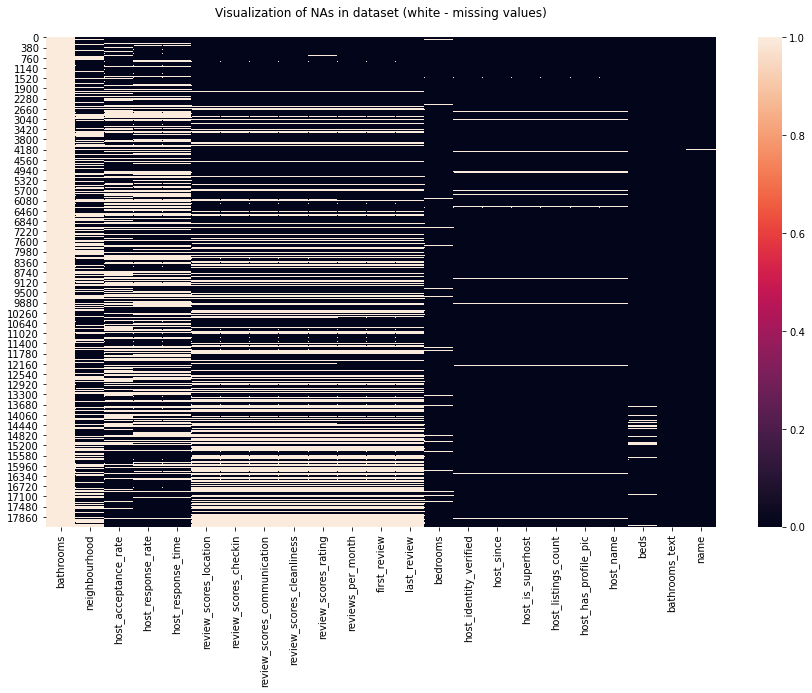

In [240]:
plt.figure(figsize=(15,9))
sns.heatmap(df[missing_df.query('Total > 0').index].isna()); # selecting only those variables which contain any missings
plt.title('Visualization of NAs in dataset (white - missing values)\n');

In [241]:
cols_missing = missing_df.query('Total > 0 and Percent < 0.1').index.to_list()
cols_missing

['bedrooms',
 'host_identity_verified',
 'host_since',
 'host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_name',
 'beds',
 'bathrooms_text',
 'name']

In [242]:
listing = listing.dropna(subset=['bedrooms','host_listings_count','beds','bathrooms_text','name']).reset_index(drop=True)

In [243]:
# usuniecie $ i konwersja price na typ numeryczny
listing['price'] = listing['price'].apply(lambda x: x[1:].replace(',','')).astype(float)

In [244]:
# listing.price.astype(int)

In [245]:
listing.shape

(16664, 29)

In [246]:
%%time
# bathrooms
listing['bathrooms_type'] = 'private'
listing['bathrooms'] = 0.0
for i, val in listing.iterrows():
    if 'shared' in listing.iat[i,13]:
        listing.iat[i,29] = 'shared'
    if ('half-bath' in listing.iat[i,13]) or ('Half-bath' in listing.iat[i,13]):
        listing.iat[i,12] = 0.5
    first_word = listing.iat[i,13].split(' ', 1)[0]
    if len(first_word) <= 4:
        listing.iat[i,12] = float(first_word)
listing['bathrooms_text'] = listing['bathrooms_type']

Wall time: 5.3 s


In [248]:
listing = listing.drop('bathrooms_type', axis=1).rename(columns={'bathrooms_text':'bathrooms_type'})

In [252]:
# beds
listing['bedrooms'] = listing.bedrooms.astype(int)
listing['beds'] = listing.beds.astype(int)

In [253]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           16664 non-null  int64  
 1   last_scraped                 16664 non-null  object 
 2   host_id                      16664 non-null  int64  
 3   name                         16664 non-null  object 
 4   latitude                     16664 non-null  float64
 5   longitude                    16664 non-null  float64
 6   property_type                16664 non-null  object 
 7   room_type                    16664 non-null  object 
 8   instant_bookable             16664 non-null  object 
 9   first_review                 11685 non-null  object 
 10  last_review                  11685 non-null  object 
 11  accommodates                 16664 non-null  int64  
 12  bathrooms                    16664 non-null  float64
 13  bathrooms_type  